##Dependencies
* Getting access to Google + Google sheet
* Downloading proper libraries (pandas, numpy, scipy, etc.)

In [503]:
#Give collab access to my google account
from google.colab import auth, drive
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [504]:
pip install researchpy

In [505]:
pip install pingouin

In [506]:
#Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import researchpy as rp
import scipy.stats as stats
import numpy as np
from pingouin import ancova

In [507]:
images_dir = '/content/gdrive/My Drive/Sustainable Swaps Study/Writing/Figures/'

In [508]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

##Data Cleaning
Creating `participantDf` of participant data, `uesDf` of user short form data, and `postDf` of addition post survey data.

In [509]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1gLfCi4-Nuuk0Hs3FlwtH_UzLIFoSJkycc1k2k_fo51E/edit?usp=sharing')

In [510]:
sessionDataByParticipantSheet = wb.worksheet('SessionDataByParticipant')
uesSheet = wb.worksheet('PostFormData')

In [511]:
def makeDf(sheet, flag):
  data = sheet.get_all_values()
  df = pd.DataFrame(data)
  if flag:
    df.columns = df.iloc[0]
    df = df.iloc[1:]
  else:
    df.columns = df.iloc[1]
    df = df.iloc[2:]
  df = df.iloc[: , :-1]
  return df

In [512]:
participantDf = makeDf(sessionDataByParticipantSheet, True)
uesDf = makeDf(uesSheet, False)
postDf = makeDf(uesSheet, False)

In [513]:
CONTROL_COLOR = "#744E0F"
N1_COLOR = "#FF9900"
N2_COLOR = "#8EDC3B"

#Session Data Engagement Analysis
From data collected through the session process: the percentage of participants who clicked extension, the parcentage of participants who looked at recomendation, and the parcentage of participants who accepted the recommendation.

##Data Prep

In [514]:
VARS = ['%ClickedExt', '%LookedRec', '%ChoseRec'];

In [515]:
'''Converting data to floats'''
for var in VARS:
  participantDf[var] = participantDf[var].astype(str).astype(float)

In [516]:
'''Splitting into group dataframes'''
control = participantDf[participantDf['Group'] == '0']
n1 = participantDf[participantDf['Group'] == '1']
n2 = participantDf[participantDf['Group'] == '2']

In [517]:
participantDf.describe()

,%ClickedExt,%LookedRec,%ChoseRec
count,22.000000,22.000000,22.000000
mean,0.828680,0.927273,0.480303
std,0.252275,0.150004,0.368740
min,0.214286,0.500000,0.000000
25%,0.635417,1.000000,0.062500
50%,1.000000,1.000000,0.500000
75%,1.000000,1.000000,0.729167
max,1.000000,1.000000,1.000000


In [518]:
control.describe()

,%ClickedExt,%LookedRec,%ChoseRec
count,8.000000,8.000000,8.000000
mean,0.755208,0.825000,0.385417
std,0.273170,0.208357,0.375165
min,0.375000,0.500000,0.000000
25%,0.500000,0.650000,0.000000
50%,0.833333,0.916667,0.416667
75%,1.000000,1.000000,0.562500
max,1.000000,1.000000,1.000000


In [519]:
control.median()

0
ID                        14.500000
Group                      0.000000
LookedAt                   5.500000
ExtensionClicked           3.500000
LookedAtRecommendation     3.000000
ChoseRecommendation        1.000000
%ClickedExt                0.833333
%LookedRec                 0.916667
%ChoseRec                  0.416667
dtype: float64

In [520]:
n1.describe()

,%ClickedExt,%LookedRec,%ChoseRec
count,6.000000,6.000000,6.000000
mean,0.958333,0.966667,0.688889
std,0.102062,0.081650,0.369183
min,0.750000,0.800000,0.000000
25%,1.000000,1.000000,0.666667
50%,1.000000,1.000000,0.733333
75%,1.000000,1.000000,0.950000
max,1.000000,1.000000,1.000000


In [521]:
n1.median()

0
ID                        15.500000
Group                      1.000000
LookedAt                   3.500000
ExtensionClicked           3.000000
LookedAtRecommendation     3.000000
ChoseRecommendation        2.500000
%ClickedExt                1.000000
%LookedRec                 1.000000
%ChoseRec                  0.733333
dtype: float64

In [522]:
n2.describe()

,%ClickedExt,%LookedRec,%ChoseRec
count,8.000000,8.0,8.000000
mean,0.804911,1.0,0.418750
std,0.296044,0.0,0.343354
min,0.214286,1.0,0.000000
25%,0.618750,1.0,0.187500
50%,1.000000,1.0,0.416667
75%,1.000000,1.0,0.616667
max,1.000000,1.0,1.000000


In [523]:
n2.median()

0
ID                        6.000000
Group                     2.000000
LookedAt                  4.000000
ExtensionClicked          3.000000
LookedAtRecommendation    3.000000
ChoseRecommendation       1.000000
%ClickedExt               1.000000
%LookedRec                1.000000
%ChoseRec                 0.416667
dtype: float64

##Visualizations

In [524]:
control_means = [control[var].mean() for var in VARS]
n1_means = [n1[var].mean() for var in VARS]
n2_means = [n2[var].mean() for var in VARS]
print('CONTROL: ',control_means)
print('N1: ',n1_means)
print('N2: ',n2_means)

CONTROL:  [0.7552083333375, 0.8249999999999998, 0.3854166666625]
N1:  [0.9583333333333334, 0.9666666666666667, 0.6888888888999999]
N2:  [0.8049107142875, 1.0, 0.41875]


In [525]:
control_std= [control[var].std() for var in VARS]
n1_std = [n1[var].std() for var in VARS]
n2_std = [n2[var].std() for var in VARS]
print('CONTROL: ',control_std)
print('N1: ',n1_std)
print('N2: ',n2_std)

CONTROL:  [0.27316986618733685, 0.20835714149294504, 0.37516530748058774]
N1:  [0.10206207261596574, 0.08164965809277258, 0.36918328279555634]
N2:  [0.29604374762489644, 0.0, 0.34335384821280174]


In [526]:
x = np.arange(len(VARS))  # the label locations
width = 0.25  # the width of the bars

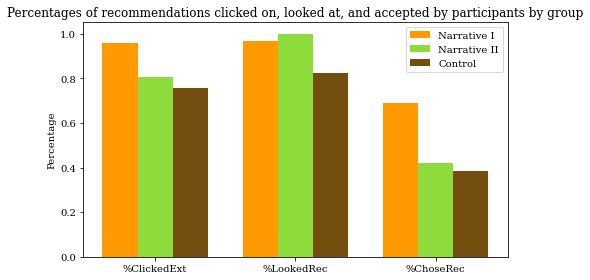

In [527]:
fig, ax = plt.subplots(figsize=(8,4))

ax.bar(x - width, n1_means, width, label='Narrative I', color=N1_COLOR)
ax.bar(x, n2_means, width, label='Narrative II', color=N2_COLOR)
ax.bar(x + width, control_means, width, label='Control', color=CONTROL_COLOR)

ax.set_ylabel('Percentage')
ax.set_title('Percentages of recommendations clicked on, looked at, and accepted by participants by group')
ax.set_xticks(x)
ax.set_xticklabels(VARS)
ax.legend(bbox_to_anchor=(1, 1))
fig.tight_layout()
fig.savefig(f"{images_dir}session_data_noerr.png")
plt.show()

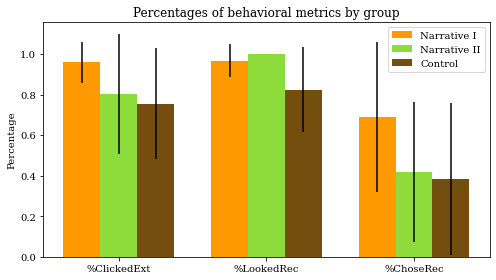

In [528]:
fig, ax = plt.subplots(figsize=(7,4))

ax.bar(x - width, n1_means, width, label='Narrative I', yerr=n1_std, color=N1_COLOR)
ax.bar(x, n2_means, width, label='Narrative II', yerr=n2_std, color=N2_COLOR)
ax.bar(x + width, control_means, width, label='Control', yerr=control_std, color=CONTROL_COLOR)

ax.set_ylabel('Percentage')
ax.set_title('Percentages of behavioral metrics by group')
ax.set_xticks(x)
ax.set_xticklabels(VARS)
ax.legend(bbox_to_anchor=(1, 1))
fig.tight_layout()
fig.savefig(f"{images_dir}session_data.png")
plt.show()

##Assumption Checks
* Normality
* Homogeneity

Normality assumption probability for  %ClickedExt


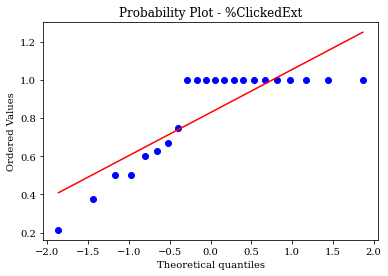



Normality assumption probability for  %LookedRec


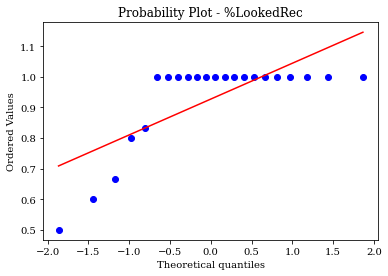



Normality assumption probability for  %ChoseRec


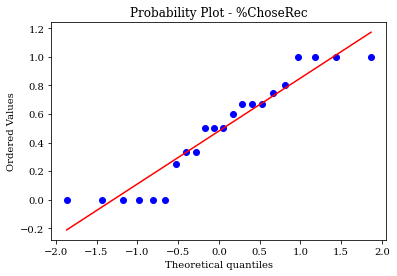

In [529]:
'''Normality assumption check (straight enough)'''
for var in VARS:
  print('Normality assumption probability for ', var)
  stats.probplot(participantDf[var], dist="norm", plot=plt)
  plt.title("Probability Plot - "+var)
  plt.show()
  print('\n')

In [530]:
'''Homogeneity of assumption check (checking if ratio of 
largest to smallest standard deviation is less than two)'''
ratio = participantDf.groupby('Group').std().max() / participantDf.groupby('Group').std().min()
for var in VARS:
  if ratio[var] > 2:
    print('THE '+var+' VARIABLE DOES NOT PASS HOMOGENITY OF ASSUMPTION CHECK')

THE %ClickedExt VARIABLE DOES NOT PASS HOMOGENITY OF ASSUMPTION CHECK
THE %LookedRec VARIABLE DOES NOT PASS HOMOGENITY OF ASSUMPTION CHECK


##Significance Testing
* One-way Anova
* Two-sample t-test
* Non-parametric Kruskal test

###ANOVA Testing

In [531]:
participantDf.head()

,ID,Group,LookedAt,ExtensionClicked,LookedAtRecommendation,ChoseRecommendation,%ClickedExt,%LookedRec,%ChoseRec
1,11,2,5,3,3,1,0.60,1.0,0.333333
2,14,1,4,3,3,3,0.75,1.0,1.000000
3,13,1,5,5,4,4,1.00,0.8,0.800000
4,20,1,4,4,4,0,1.00,1.0,0.000000
5,12,0,2,2,2,1,1.00,1.0,0.500000


In [532]:
'''One way ANOVA test for significant difference amongst groups'''
for var in VARS:
  print('Showing results for - '+var+"...")
  print(stats.f_oneway(control[var], n1[var], n2[var]))
  print('\n')

Showing results for - %ClickedExt...
F_onewayResult(statistic=1.18808623296569, pvalue=0.32645605927361354)


Showing results for - %LookedRec...
F_onewayResult(statistic=3.811666916405355, pvalue=0.040566360836864684)


Showing results for - %ChoseRec...
F_onewayResult(statistic=1.3853175566100386, pvalue=0.27439978692576256)




###T-Testing
* Between `control`, `n1`
* Between `control`, `n2`
* Between `n1`, `n2`

In [533]:
'''Two-sample t-test between control and n1 groups for all variables'''
for var in VARS:
  print('Showing results for - '+var+" between control, n1...")
  print(rp.ttest(control[var], n1[var]))

Showing results for - %ClickedExt between control, n1...
(      Variable     N      Mean        SD        SE  95% Conf.  Interval
0  %ClickedExt   8.0  0.755208  0.273170  0.096580   0.526833  0.983584
1  %ClickedExt   6.0  0.958333  0.102062  0.041667   0.851226  1.065441
2     combined  14.0  0.842262  0.234668  0.062718   0.706769  0.977755,                           Independent t-test  results
0  Difference (%ClickedExt - %ClickedExt) =   -0.2031
1                      Degrees of freedom =   12.0000
2                                       t =   -1.7191
3                   Two side test p value =    0.1113
4                  Difference < 0 p value =    0.0556
5                  Difference > 0 p value =    0.9444
6                               Cohen's d =   -0.9284
7                               Hedge's g =   -0.8691
8                           Glass's delta =   -0.7436
9                             Pearson's r =    0.4445)
Showing results for - %LookedRec between control, n1...
( 

In [534]:
'''Two-sample t-test between control and n2 groups for all variables'''
for var in VARS:
  print('Showing results for - '+var+" between control, n2...")
  print(rp.ttest(control[var], n2[var]))

Showing results for - %ClickedExt between control, n2...
(      Variable     N      Mean        SD        SE  95% Conf.  Interval
0  %ClickedExt   8.0  0.755208  0.273170  0.096580   0.526833  0.983584
1  %ClickedExt   8.0  0.804911  0.296044  0.104667   0.557412  1.052409
2     combined  16.0  0.780060  0.276373  0.069093   0.632791  0.927328,                           Independent t-test  results
0  Difference (%ClickedExt - %ClickedExt) =   -0.0497
1                      Degrees of freedom =   14.0000
2                                       t =   -0.3490
3                   Two side test p value =    0.7323
4                  Difference < 0 p value =    0.3661
5                  Difference > 0 p value =    0.6339
6                               Cohen's d =   -0.1745
7                               Hedge's g =   -0.1650
8                           Glass's delta =   -0.1819
9                             Pearson's r =    0.0929)
Showing results for - %LookedRec between control, n2...
( 

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [535]:
'''Two-sample t-test between n1 and n2 groups for all variables'''
for var in VARS:
  print('Showing results for - '+var+" between n1, n2...")
  print(rp.ttest(n1[var], n2[var]))

Showing results for - %ClickedExt between n1, n2...
(      Variable     N      Mean        SD        SE  95% Conf.  Interval
0  %ClickedExt   6.0  0.958333  0.102062  0.041667   0.851226  1.065441
1  %ClickedExt   8.0  0.804911  0.296044  0.104667   0.557412  1.052409
2     combined  14.0  0.870663  0.239596  0.064035   0.732325  1.009002,                           Independent t-test  results
0  Difference (%ClickedExt - %ClickedExt) =    0.1534
1                      Degrees of freedom =   12.0000
2                                       t =    1.2063
3                   Two side test p value =    0.2510
4                  Difference < 0 p value =    0.8745
5                  Difference > 0 p value =    0.1255
6                               Cohen's d =    0.6514
7                               Hedge's g =    0.6099
8                           Glass's delta =    1.5032
9                             Pearson's r =    0.3288)
Showing results for - %LookedRec between n1, n2...
(     Variab

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


###Non-parametric testing
Data does not appear to pass assumptions needed for normality, therefore this test is likely more accurate.

In [536]:
for var in VARS:
  print('Showing Kruskal results for - '+var+"...")
  print(stats.kruskal(control[var], n1[var], n2[var]))
  print('\n')

Showing Kruskal results for - %ClickedExt...
KruskalResult(statistic=2.2567015209125363, pvalue=0.3235664552080881)


Showing Kruskal results for - %LookedRec...
KruskalResult(statistic=5.818062827225101, pvalue=0.05452851988130398)


Showing Kruskal results for - %ChoseRec...
KruskalResult(statistic=3.114480198019809, pvalue=0.21071682699733815)




In [537]:
possibleDfs = [control, n1, n2]
for var in VARS:
  for df in possibleDfs:
    print('NEW GROUP....\n')
    print('Showing Kruskal results for - '+var+"...")
    print(stats.kruskal(df[var], participantDf[var]))
    print('\n')

NEW GROUP....

Showing Kruskal results for - %ClickedExt...
KruskalResult(statistic=0.5514306410720827, pvalue=0.45773372351350694)


NEW GROUP....

Showing Kruskal results for - %ClickedExt...
KruskalResult(statistic=1.2414410828025406, pvalue=0.26519350268352465)


NEW GROUP....

Showing Kruskal results for - %ClickedExt...
KruskalResult(statistic=0.018439204036789142, pvalue=0.8919864817938371)


NEW GROUP....

Showing Kruskal results for - %LookedRec...
KruskalResult(statistic=2.093858784387419, pvalue=0.14789210562379362)


NEW GROUP....

Showing Kruskal results for - %LookedRec...
KruskalResult(statistic=0.15215921167038957, pvalue=0.6964804193907781)


NEW GROUP....

Showing Kruskal results for - %LookedRec...
KruskalResult(statistic=2.086831374430309, pvalue=0.148573948466652)


NEW GROUP....

Showing Kruskal results for - %ChoseRec...
KruskalResult(statistic=0.4165024902282235, pvalue=0.5186874129947827)


NEW GROUP....

Showing Kruskal results for - %ChoseRec...
KruskalResult

#User Engagement Short Form
From data collected through UES short form: broken down into sub-scores by FA, PU, AE, RW

##Data Prep

In [538]:
CODES = ['FA', 'PU', 'AE', 'RW', '']
CODE_TOTALS = [c+"Total" for c in CODES]
FA_CODES = ["FA"+str(i) for i in range(1, 4)]
PU_CODES = ["PU"+str(i) for i in range(1, 4)]
AE_CODES = ["AE"+str(i) for i in range(1, 4)]
RW_CODES = ["RW"+str(i) for i in range(1, 4)]
Q_CODES = FA_CODES + PU_CODES + AE_CODES + RW_CODES

In [539]:
uesDf = uesDf.iloc[:-4, :-17]
uesDf['Total'] = uesDf[Q_CODES].mean(axis=1)

for q in Q_CODES:
  uesDf[q] = uesDf[q].astype(str).astype(int)

for c in CODE_TOTALS:
  uesDf[c] = uesDf[c].astype(str).astype(float)

In [540]:
uesDf['Total'] = uesDf[Q_CODES].mean(axis=1)

In [541]:
'''Splitting into group dataframes'''
control = uesDf[uesDf['Group'] == '0']
n1 = uesDf[uesDf['Group'] == '1']
n2 = uesDf[uesDf['Group'] == '2']

In [542]:
uesDf[CODE_TOTALS].describe()

1,FATotal,PUTotal,AETotal,RWTotal,Total
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,3.181818,4.439394,3.636364,4.121212,3.844697
std,0.979835,0.700615,1.097901,0.870112,0.659332
min,1.333333,2.000000,1.666667,2.000000,2.333333
25%,2.416667,4.083333,2.833333,3.750000,3.395833
50%,3.166667,4.666667,3.666667,4.333333,4.041667
75%,3.916667,4.916667,4.666667,4.916667,4.312500
max,5.000000,5.000000,5.000000,5.000000,4.916667


In [543]:
uesDf.groupby('Group')[CODE_TOTALS].mean()

1,FATotal,PUTotal,AETotal,RWTotal,Total
Group,,,,,
0,3.250000,4.083333,2.958333,3.791667,3.520833
1,3.444444,4.888889,4.277778,4.166667,4.194444
2,2.916667,4.458333,3.833333,4.416667,3.906250


In [544]:
uesDf.groupby('Group')[CODE_TOTALS].std()

1,FATotal,PUTotal,AETotal,RWTotal,Total
Group,,,,,
0,1.035098,0.921524,1.160699,1.111805,0.827060
1,1.128749,0.172133,0.646930,0.888194,0.613883
2,0.868313,0.532663,1.023533,0.496016,0.349142


In [545]:
n2[CODE_TOTALS].describe()

1,FATotal,PUTotal,AETotal,RWTotal,Total
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,2.916667,4.458333,3.833333,4.416667,3.906250
std,0.868313,0.532663,1.023533,0.496016,0.349142
min,2.000000,3.333333,2.000000,3.666667,3.333333
25%,2.250000,4.500000,3.333333,4.000000,3.645833
50%,2.833333,4.666667,3.666667,4.500000,4.041667
75%,3.250000,4.666667,4.750000,4.750000,4.083333
max,4.333333,5.000000,5.000000,5.000000,4.416667


##Assumption Checks
* Normality
* Homogeneity

Normality assumption probability for  FATotal


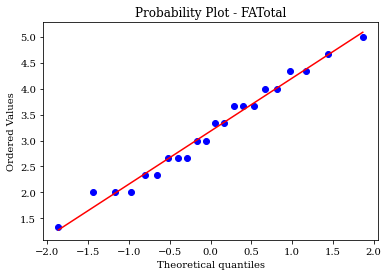



Normality assumption probability for  PUTotal


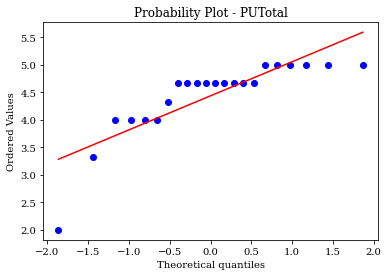



Normality assumption probability for  AETotal


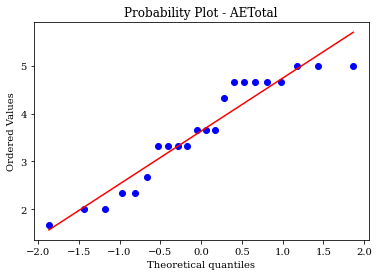



Normality assumption probability for  RWTotal


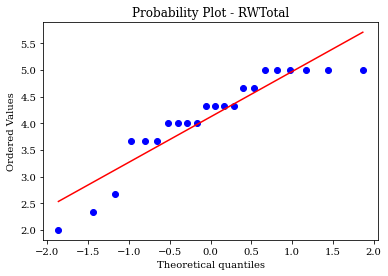



Normality assumption probability for  Total


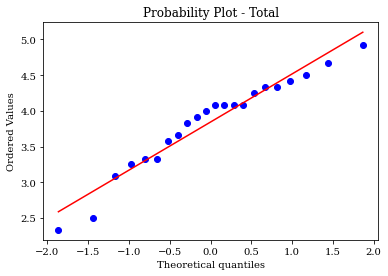

In [546]:
'''Normality assumption check (straight enough)'''
for ct in CODE_TOTALS:
  print('Normality assumption probability for ', ct)
  stats.probplot(uesDf[ct], dist="norm", plot=plt)
  plt.title("Probability Plot - "+ct)
  plt.show()
  print('\n')

These plots do not look straight enough, and thus do not pass the assumption of normality.

In [547]:
'''Homogeneity of assumption check (checking if ratio of 
largest to smallest standard deviation is less than two)'''
ratio = uesDf.groupby('Group').std().max() / uesDf.groupby('Group').std().min()
ratio

1
FA1        1.189577
FA2        1.165922
FA3        2.140872
FATotal    1.299933
PU1        2.070197
PU2             inf
PU3             inf
PUTotal    5.353570
AE1        2.716791
AE2        1.700840
AE3        1.560736
AETotal    1.794165
RW1        1.900764
RW2        2.206709
RW3        1.607275
RWTotal    2.241471
Total      2.368838
dtype: float64

In [548]:
for c in CODE_TOTALS:
  if ratio[c] > 2:
    print('THE '+c+' VARIABLE DOES NOT PASS HOMOGENITY OF ASSUMPTION CHECK')
for c in Q_CODES:
  if ratio[c] > 2:
    print('THE '+c+' VARIABLE DOES NOT PASS HOMOGENITY OF ASSUMPTION CHECK')

THE PUTotal VARIABLE DOES NOT PASS HOMOGENITY OF ASSUMPTION CHECK
THE RWTotal VARIABLE DOES NOT PASS HOMOGENITY OF ASSUMPTION CHECK
THE Total VARIABLE DOES NOT PASS HOMOGENITY OF ASSUMPTION CHECK
THE FA3 VARIABLE DOES NOT PASS HOMOGENITY OF ASSUMPTION CHECK
THE PU1 VARIABLE DOES NOT PASS HOMOGENITY OF ASSUMPTION CHECK
THE PU2 VARIABLE DOES NOT PASS HOMOGENITY OF ASSUMPTION CHECK
THE PU3 VARIABLE DOES NOT PASS HOMOGENITY OF ASSUMPTION CHECK
THE AE1 VARIABLE DOES NOT PASS HOMOGENITY OF ASSUMPTION CHECK
THE RW2 VARIABLE DOES NOT PASS HOMOGENITY OF ASSUMPTION CHECK


##Significance Testing
* One-way Anova
* Non-parametric Kruskal, Mood's median test

###Parametric ANOVA Testing

In [549]:
'''One-way ANOVA Testing for UES and breakdown scores'''
for ct in CODE_TOTALS:
  print('Showing results for - '+ct+"...")
  print(stats.f_oneway(control[ct], n1[ct], n2[ct]))
  print('\n')

Showing results for - FATotal...
F_onewayResult(statistic=0.5028134342910138, pvalue=0.6126517063797101)


Showing results for - PUTotal...
F_onewayResult(statistic=2.6215941650613046, pvalue=0.09875446125251594)


Showing results for - AETotal...
F_onewayResult(statistic=3.252896010876287, pvalue=0.0609663893769417)


Showing results for - RWTotal...
F_onewayResult(statistic=1.0479234640298238, pvalue=0.3700735416273162)


Showing results for - Total...
F_onewayResult(statistic=2.023961985186945, pvalue=0.159645613063938)




###Non-parametric Testing
Since the data could not pass assumptions of normality, this testing is likely more accurate.

In [550]:
for ct in CODE_TOTALS:
  print('Showing Kruskal results for - '+ct+"...")
  print(stats.kruskal(control[ct], n1[ct], n2[ct]))
  print('\n')

Showing Kruskal results for - FATotal...
KruskalResult(statistic=1.310504561003416, pvalue=0.519311034011563)


Showing Kruskal results for - PUTotal...
KruskalResult(statistic=7.247353673723524, pvalue=0.02668438177800667)


Showing Kruskal results for - AETotal...
KruskalResult(statistic=4.948476314269215, pvalue=0.08422713366146296)


Showing Kruskal results for - RWTotal...
KruskalResult(statistic=1.2534336645236706, pvalue=0.5343432628237619)


Showing Kruskal results for - Total...
KruskalResult(statistic=3.552728823195002, pvalue=0.1692523620004701)




In [551]:
for ct in CODE_TOTALS:
  print('Showing Moods Median results for - '+ct+"...")
  print(stats.median_test(control[ct], n1[ct], n2[ct]))
  print('\n')

Showing Moods Median results for - FATotal...
(4.666666666666666, 0.09697196786440512, 3.1666666665000003, array([[4, 5, 2],
       [4, 1, 6]]))


Showing Moods Median results for - PUTotal...
(6.45486111111111, 0.03965927027599677, 4.666666667, array([[1, 4, 1],
       [7, 2, 7]]))


Showing Moods Median results for - AETotal...
(2.5227920227920224, 0.28325831851694355, 3.666666667, array([[2, 4, 3],
       [6, 2, 5]]))


Showing Moods Median results for - RWTotal...
(1.1130952380952381, 0.5731845031631106, 4.333333333, array([[2, 2, 4],
       [6, 4, 4]]))


Showing Moods Median results for - Total...
(4.666666666666666, 0.09697196786440512, 4.041666666666666, array([[2, 5, 4],
       [6, 1, 4]]))




##Visualizations

###Total UES Scores By Group

In [552]:
means = [control['Total'].mean(), n1['Total'].mean(), n2['Total'].mean()]
stds = [control['Total'].std(), n1['Total'].std(), n2['Total'].std()]
print(means)
print(stds)

[3.520833333333333, 4.194444444444445, 3.90625]
[0.8270597183866336, 0.613882604291612, 0.3491415208583785]


In [553]:
x = np.arange(3)  # the label locations
width = 0.5  # the width of the bars

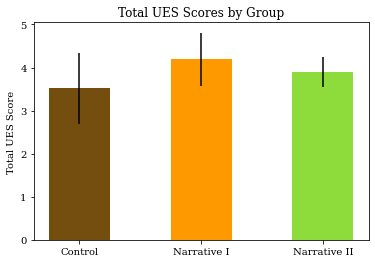

In [554]:
fig, ax = plt.subplots()

ax.bar(x, means, width, yerr=stds, color=[CONTROL_COLOR, N1_COLOR, N2_COLOR])

ax.set_ylabel('Total UES Score')
ax.set_title('Total UES Scores by Group')
ax.set_xticks(x)
ax.set_xticklabels(['Control', 'Narrative I', 'Narrative II'])
fig.savefig(f"{images_dir}ues_group.png")
plt.show()

###UES Breakdown Scores By Group

In [555]:
fa_means = [control['FATotal'].mean(), n1['FATotal'].mean(), n2['FATotal'].mean()]
ae_means = [control['AETotal'].mean(), n1['AETotal'].mean(), n2['AETotal'].mean()]
pu_means = [control['PUTotal'].mean(), n1['PUTotal'].mean(), n2['PUTotal'].mean()]
rw_means = [control['RWTotal'].mean(), n1['RWTotal'].mean(), n2['RWTotal'].mean()]

fa_std = [control['FATotal'].std(), n1['FATotal'].std(), n2['FATotal'].std()]
ae_std = [control['AETotal'].std(), n1['AETotal'].std(), n2['AETotal'].std()]
pu_std = [control['PUTotal'].std(), n1['PUTotal'].std(), n2['PUTotal'].std()]
rw_std = [control['RWTotal'].std(), n1['RWTotal'].std(), n2['RWTotal'].std()]

In [556]:
x = np.arange(3)  # the label locations
width = 0.2  # the width of the bars

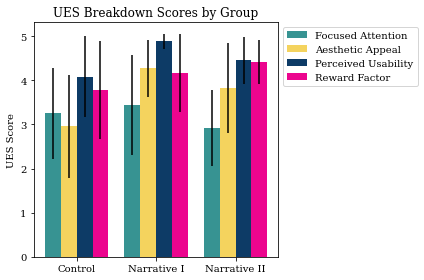

In [557]:
fig, ax = plt.subplots()

ax.bar(x - (width*1.5), fa_means, width, yerr=fa_std, color="#379392", label="Focused Attention")
ax.bar(x - (width/2), ae_means, width, yerr=ae_std, color="#F4D35E", label="Aesthetic Appeal")
ax.bar(x + (width/2), pu_means, width, yerr=pu_std, color="#0D3B66", label="Perceived Usability")
ax.bar(x + (width*1.5), rw_means, width, yerr=rw_std, color="#EC058E", label="Reward Factor")

ax.set_ylabel('UES Score')
ax.set_title('UES Breakdown Scores by Group')
ax.set_xticks(x)
ax.set_xticklabels(['Control', 'Narrative I', 'Narrative II'])
ax.legend(bbox_to_anchor=(1, 1))
fig.tight_layout()
fig.savefig(f"{images_dir}ues_breakdown_group.png")
plt.show()

###UES Group Scores by Breakdown

In [558]:
control_means = [control[c].mean() for c in CODE_TOTALS]
n1_means = [n1[c].mean() for c in CODE_TOTALS]
n2_means = [n2[c].mean() for c in CODE_TOTALS]

In [559]:
control_std = [control[c].std() for c in CODE_TOTALS]
n1_std = [n1[c].std() for c in CODE_TOTALS]
n2_std = [n2[c].std() for c in CODE_TOTALS]

In [560]:
x = np.arange(len(CODE_TOTALS))  # the label locations
width = 0.25  # the width of the bars

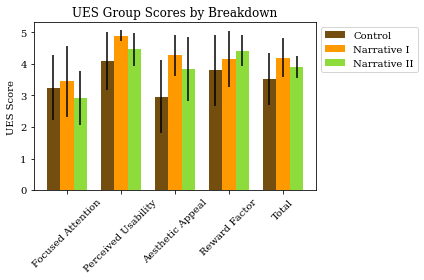

In [561]:
fig, ax = plt.subplots()

ax.bar(x - (width), control_means, width, yerr=control_std, label="Control", color=CONTROL_COLOR)
ax.bar(x, n1_means, width, yerr=n1_std, label="Narrative I", color=N1_COLOR)
ax.bar(x + (width), n2_means, width, yerr=n2_std, label="Narrative II", color=N2_COLOR)

ax.set_ylabel('UES Score')
ax.set_title('UES Group Scores by Breakdown')
ax.set_xticks(x)
ax.set_xticklabels(['Focused Attention', 'Perceived Usability', 'Aesthetic Appeal', 'Reward Factor', 'Total'], rotation=45)
ax.legend(bbox_to_anchor=(1, 1))
fig.tight_layout()
fig.savefig(f"{images_dir}ues_group_breakdown.png")
plt.show()

#Additional Post Form Data

In [562]:
#Eliminating extraneous columns
postDf = postDf.iloc[:-4,-17:-15]

In [563]:
#Giving group tags to post df questions
postDf['Group'] = uesDf['Group']

In [564]:
'''Splitting into group dataframes'''
control = postDf[postDf['Group'] == '0']
n1 = postDf[postDf['Group'] == '1']
n2 = postDf[postDf['Group'] == '2']

#Dictionary with all relevant dataframes
dfs = {'Total': postDf, 'Control': control, 'Narrative I': n1, 'Narrative II': n2}

##Descriptive Statistics

In [565]:
for group in dfs:
  df = dfs[group]
  print('Yes percentage for '+group)
  print(df['futureUse'].value_counts()['Yes']/df['futureUse'].count())

Yes percentage for Total
0.7727272727272727
Yes percentage for Control
0.5
Yes percentage for Narrative I
0.8333333333333334
Yes percentage for Narrative II
1.0


##Significance Testing
* Chi square & chi2 contingency

In [566]:
controlCountTable = control['futureUse'].value_counts().rename_axis('unique_values').reset_index(name='control')
n1CountTable = n1['futureUse'].value_counts().rename_axis('unique_values').reset_index(name='n1')
n2CountTable = n2['futureUse'].value_counts().rename_axis('unique_values').reset_index(name='n2')

In [567]:
countTable = controlCountTable.merge(n1CountTable).merge(n2CountTable)
countTable.loc[len(countTable.index)] = ['Other', 1, 0, 0]

groups = ['control', 'n1', 'n2']
for g in groups:
  countTable[g].astype(str).astype(int)

countTable

,unique_values,control,n1,n2
0,Yes,4,5,8
1,Other,1,0,0


In [568]:
stats.chisquare(countTable.iloc[:,1:])

Power_divergenceResult(statistic=array([1.8, 5. , 8. ]), pvalue=array([0.17971249, 0.02534732, 0.00467773]))

In [569]:
stats.chi2_contingency(countTable.iloc[:,1:])

(2.7529411764705882,
 0.25246804613498636,
 2,
 array([[4.72222222, 4.72222222, 7.55555556],
        [0.27777778, 0.27777778, 0.44444444]]))

##Visualizations

In [570]:
'''Creating dictionary of adjective frequencies'''
def createAdjFreq(df):
  adjFreq = {}
  for res in df['Adjectives'].unique():
    adjList = res.strip().split(', ')
    for adj in adjList:
      if adj.lower() in adjFreq:
        adjFreq[adj.lower()] += 1
      else:
        adjFreq[adj.lower()] = 1
  return adjFreq

adjFreq = createAdjFreq(postDf)
controlAdjFreq = createAdjFreq(control)
n1AdjFreq = createAdjFreq(n1)
n2AdjFreq = createAdjFreq(n2)

In [571]:
#Dictionary containing group adjective frequency dictionaries
adjFreqs = {'Sustainable Swaps': adjFreq, 'Control': controlAdjFreq, 'Narrative I': n1AdjFreq, 'Narrative II': n2AdjFreq}

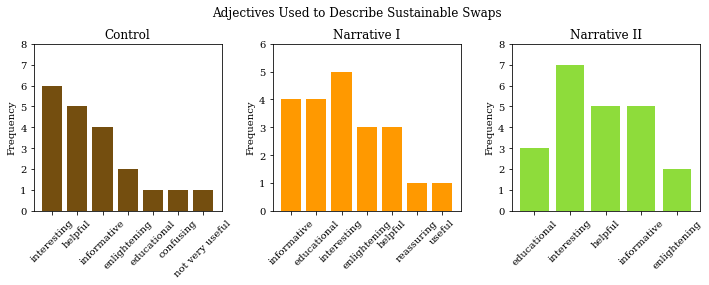

In [572]:
'''Creating bar charts of adjectives used to describe tool'''
fig, ((ax2, ax3, ax4)) = plt.subplots(1, 3, figsize=(10,4)) #constrained_layout=True
# ax1.bar(*zip(*adjFreqs['Sustainable Swaps'].items()), color="#2B2D42")
# ax1.set_title('Total')
ax2.bar(*zip(*adjFreqs['Control'].items()), color=CONTROL_COLOR)
ax2.set_title('Control')
ax3.bar(*zip(*adjFreqs['Narrative I'].items()), color=N1_COLOR)
ax3.set_title('Narrative I')
ax4.bar(*zip(*adjFreqs['Narrative II'].items()), color=N2_COLOR)
ax4.set_title('Narrative II')

for ax in fig.get_axes():
  ax.tick_params(axis='x', labelrotation = 45)
  ax.set_ylabel('Frequency')
  ax.set_ylim(0, 8)
ax3.set_ylim(0, 6)

fig.tight_layout()
fig.suptitle('Adjectives Used to Describe Sustainable Swaps')
fig.subplots_adjust(top=0.85)
fig.savefig(f"{images_dir}descriptive_adj.png")

fig.show()